In [1]:
import numpy as np
from numpy import random
import math
from matplotlib import pyplot as plt
from scipy import misc

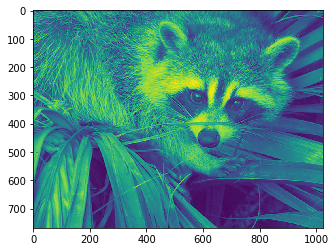

In [2]:
face = misc.face()
data = face[:,:,0] / 255
plt.imshow(data)

In [3]:
data.shape

(768, 1024)

In [4]:
m = 768 # number of data points
n = 1024 # dimensional of data
A = data # data matrix
l = 100 # dimension of low diml space

iterations = 20

In [30]:
def random_svd_rank_k(matrix, k):
    omega = random.randn(n,k)
    Y = A @ omega
    q, r = np.linalg.qr(Y)
    return q @ q.T @ matrix

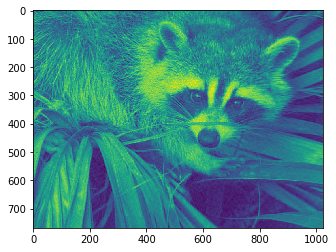

In [7]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
approx = pca.inverse_transform(pca.fit_transform(data))
plt.imshow(approx)

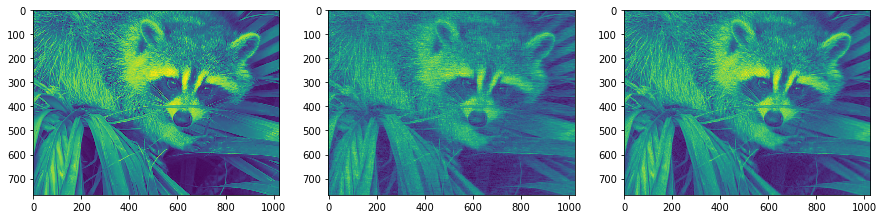

In [8]:
#fig, ax = plt.subplots(1,3, figsize=(15,15))
#ax[0].imshow(data)
#ax[1].imshow(example)
#ax[2].imshow(approx)

In [25]:
def svd_rank_k(matrix, k):
    u, sigma, vh = np.linalg.svd(matrix) #compute full svd
    u = u[:,:k] #keep all rows, take first k columns
    sigma = np.diag(sigma[:k]) #take first k singular values and make diagonal matrix
    vh = vh[:k] #take first k rows, take all columns
    return u @ sigma @ vh #return rank k approximation

In [43]:
def id_rank_k(matrix, k):
    col_norms = []
    for i in range(matrix.shape[1]):
        col_norms.append((np.linalg.norm(matrix[:,i]), i))
    col_norms.sort(reverse=True)
    
    AP = np.empty(matrix.shape)
    for i in range(matrix.shape[1]):
        AP[:,i] = A[:,col_norms[i][1]]
    
    q,r = np.linalg.qr(AP)
    q = q[:,:k]
    return q @ q.T @ matrix
    

In [53]:
def random_id_rank_k(matrix, k, p):
    if(p<=k or p>n):
        print('Invalid p')
        return False
    cols = np.random.choice(matrix.shape[1], replace = False, size = p)
    AS = matrix[:,cols]
    q,r = np.linalg.qr(AS)
    q = q[:,:k]
    return q @ q.T @ matrix

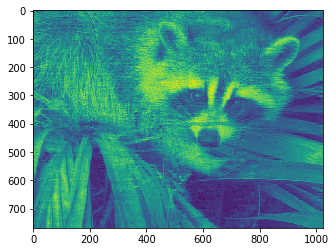

In [61]:
plt.imshow(random_id_rank_k(data, 100, 900))

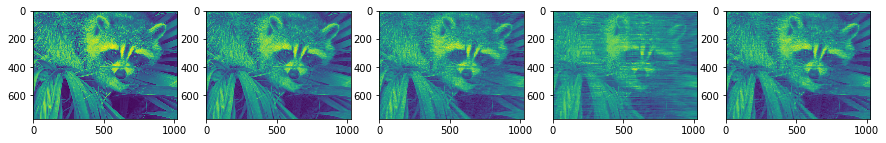

In [64]:
fig, ax = plt.subplots(1,5, figsize=(15,15))
ax[0].imshow(data)
ax[1].imshow(svd_rank_k(data, 100))
ax[2].imshow(random_svd_rank_k(data, 100))
ax[3].imshow(id_rank_k(data, 100))
ax[4].imshow(random_id_rank_k(data, 100, 101))